## Explanatory Data Analysis

In [14]:
import pandas as pd
df = pd.read_csv('../data/final_cleaned.csv.csv')   #reading the file and displaying the data
df.head(5)

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,Small Personal Air Conditioners Mini Air Condi...,appliances,Air Conditioners,3.1,85.0,2499.0,2999.0
1,ALLWIN TAFTA High Quality Metal Special Coated...,appliances,Air Conditioners,4.6,7.0,647.0,1500.0
2,Hexzone Floor AC Stand Certified Special Coate...,appliances,Air Conditioners,4.1,9.0,679.0,1249.0
3,AC Stand/Heavy Duty Air Conditioner Outdoor Un...,appliances,Air Conditioners,5.0,2.0,599.0,999.0
4,ThreeH USB Fan Silent Mini Air Conditioner Tra...,appliances,Air Conditioners,4.0,1400.0,1219.0,1449.0


In [15]:
df.describe()

,ratings,no_of_ratings,discount_price,actual_price
count,303712.000000,428931.000000,428931.000000,4.289310e+05
mean,3.796343,549.507172,776.823444,2.501288e+04
std,0.752341,7148.378262,583.884013,1.511644e+07
min,1.000000,0.000000,8.000000,1.000000e+01
25%,3.500000,0.000000,349.000000,8.990000e+02
50%,3.900000,5.000000,590.000000,1.399000e+03
75%,4.200000,53.000000,999.000000,2.299000e+03
max,5.000000,589547.000000,2914.000000,9.900000e+09


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428931 entries, 0 to 428930
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            428931 non-null  object 
 1   main_category   428931 non-null  object 
 2   sub_category    428931 non-null  object 
 3   ratings         303712 non-null  float64
 4   no_of_ratings   428931 non-null  float64
 5   discount_price  428931 non-null  float64
 6   actual_price    428931 non-null  float64
dtypes: float64(4), object(3)
memory usage: 22.9+ MB


In [17]:
df.isnull().sum()  # there are still few missing values or null values in the ratings column

name                   0
main_category          0
sub_category           0
ratings           125219
no_of_ratings          0
discount_price         0
actual_price           0
dtype: int64

In [18]:
df = df.dropna() # Dropping all the null values

In [19]:
df.isnull().sum() # now there is no null value

name              0
main_category     0
sub_category      0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64

## Univariate Analysis for categorical features like main_category and sub_category


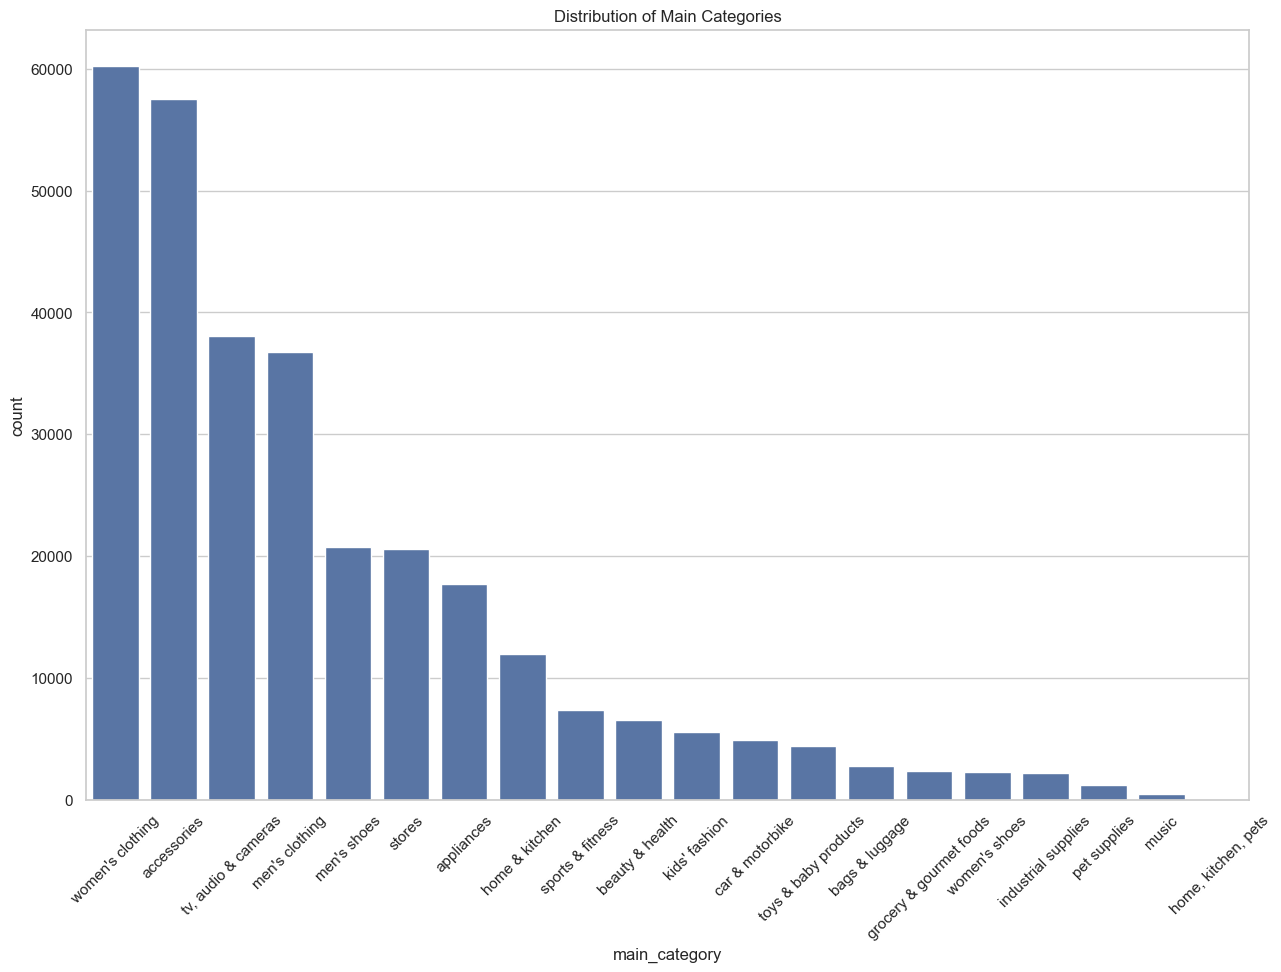

In [22]:
#Distribution of main category

import seaborn as sns
import matplotlib.pyplot as plt
category_desc_order = df['main_category'].value_counts().index
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='main_category', order=category_desc_order)
plt.title('Distribution of Main Categories')
plt.xticks(rotation=45)
plt.show()


***Observations***
- Most popular main_category is accessories and least popular is home, kitchen, pets

C:\Users\hp\AppData\Local\Temp\ipykernel_16500\327967578.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_top_20, x='sub_category', palette='viridis', order=top_20_sub_categories)


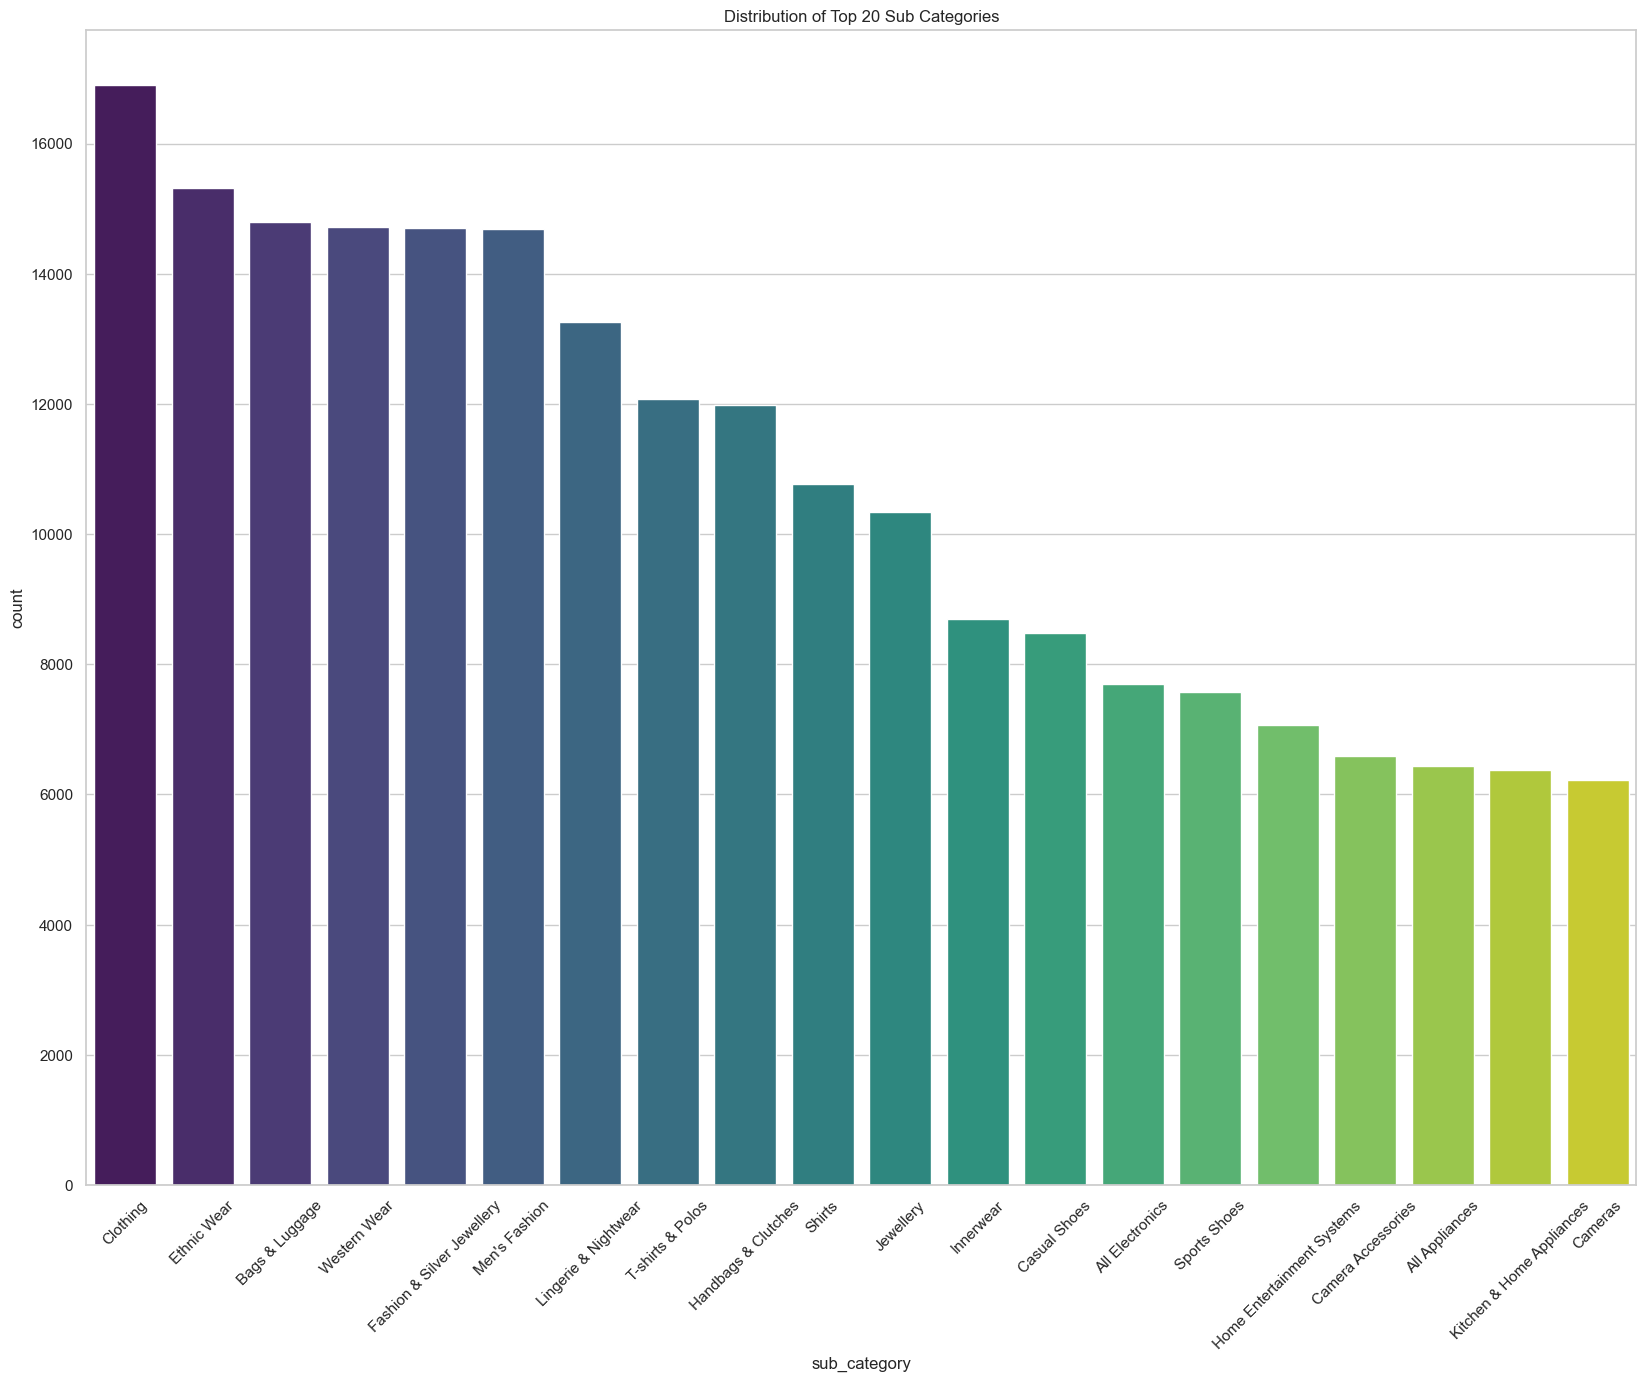

In [23]:
#Distribution of Top 20 Sub Categories

import seaborn as sns
import matplotlib.pyplot as plt
top_20_sub_categories = df['sub_category'].value_counts().nlargest(20).index  # There is a large number of sub-categories so displaying only top 20
df_top_20 = df[df['sub_category'].isin(top_20_sub_categories)]

plt.figure(figsize=(20,15))
sns.countplot(data=df_top_20, x='sub_category', palette='viridis', order=top_20_sub_categories)
plt.title('Distribution of Top 20 Sub Categories')
plt.xticks(rotation=45)
plt.show()

***Observations***
- These are the top 20 sub-categories
- Clothing is the top most popular sub-categories and fashion & silver jewellary comes second. They both are almost at the same level.
- The least is camera accessories

## Univariate analysis for numeric features

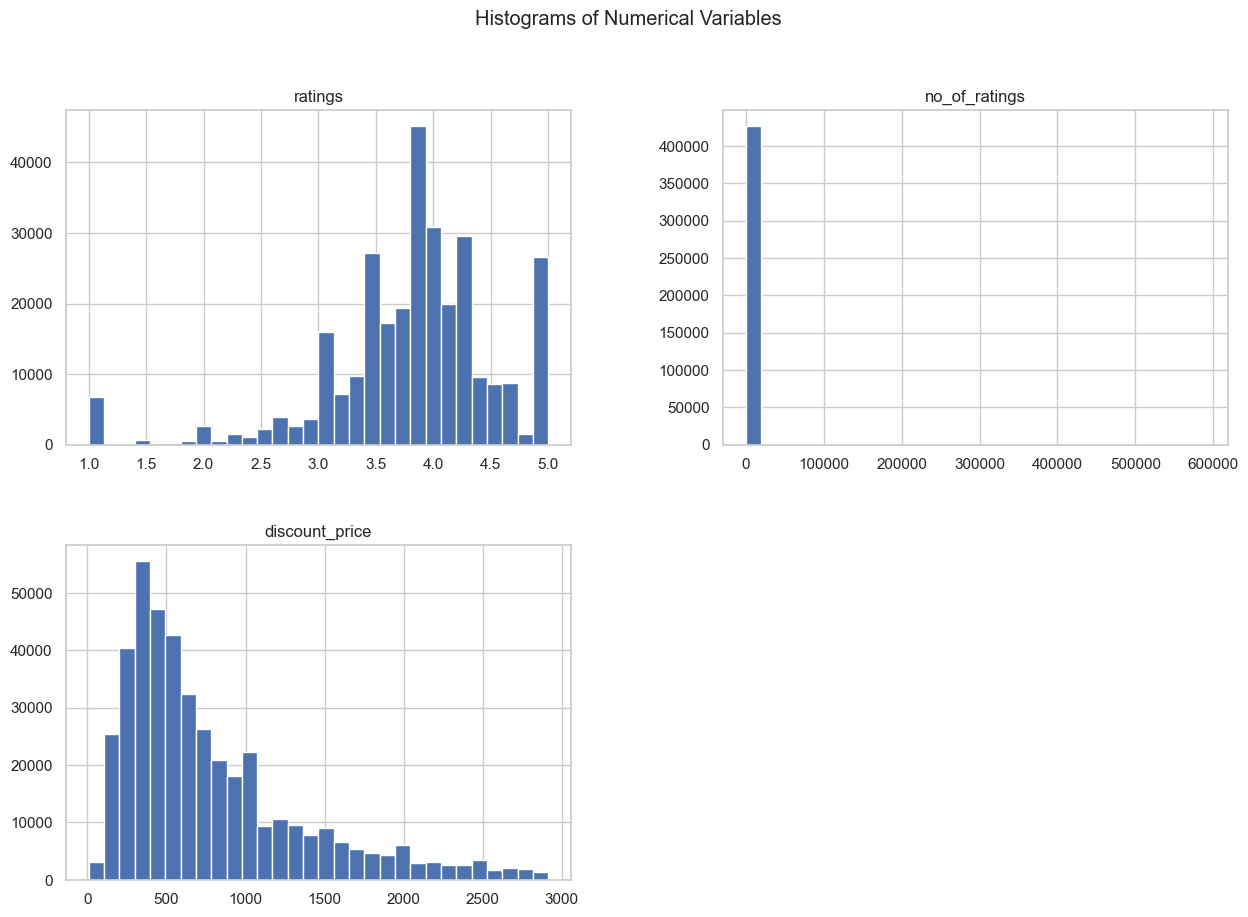

In [13]:
df[['ratings', 'no_of_ratings', 'discount_price']].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Variables')
plt.show()

***Observations***
- **Graph 1 : Distribution of ratings** from 1 to 5. The horizontal axis represents the rating values, while the vertical axis indicates the frequency of each rating. It looks like the data is skewed towards higher ratings, with the bars for ratings closer to 5.0 being taller, suggesting that higher ratings were given more frequently.
- **Graph 2 - Distribution of no_of_ratings** The fact that there are over 400,000 ratings indicates a high level of engagement or popularity. This graph is summarizing the total number of ratings received.
- **Graph 3 - Distribution of discount_price** The histogram shows that most discount prices are concentrated on the lower end of the range. This means that lower discount prices are more common, while higher discount prices are less frequent.

## Bivariate analysis on categorical and numerical features

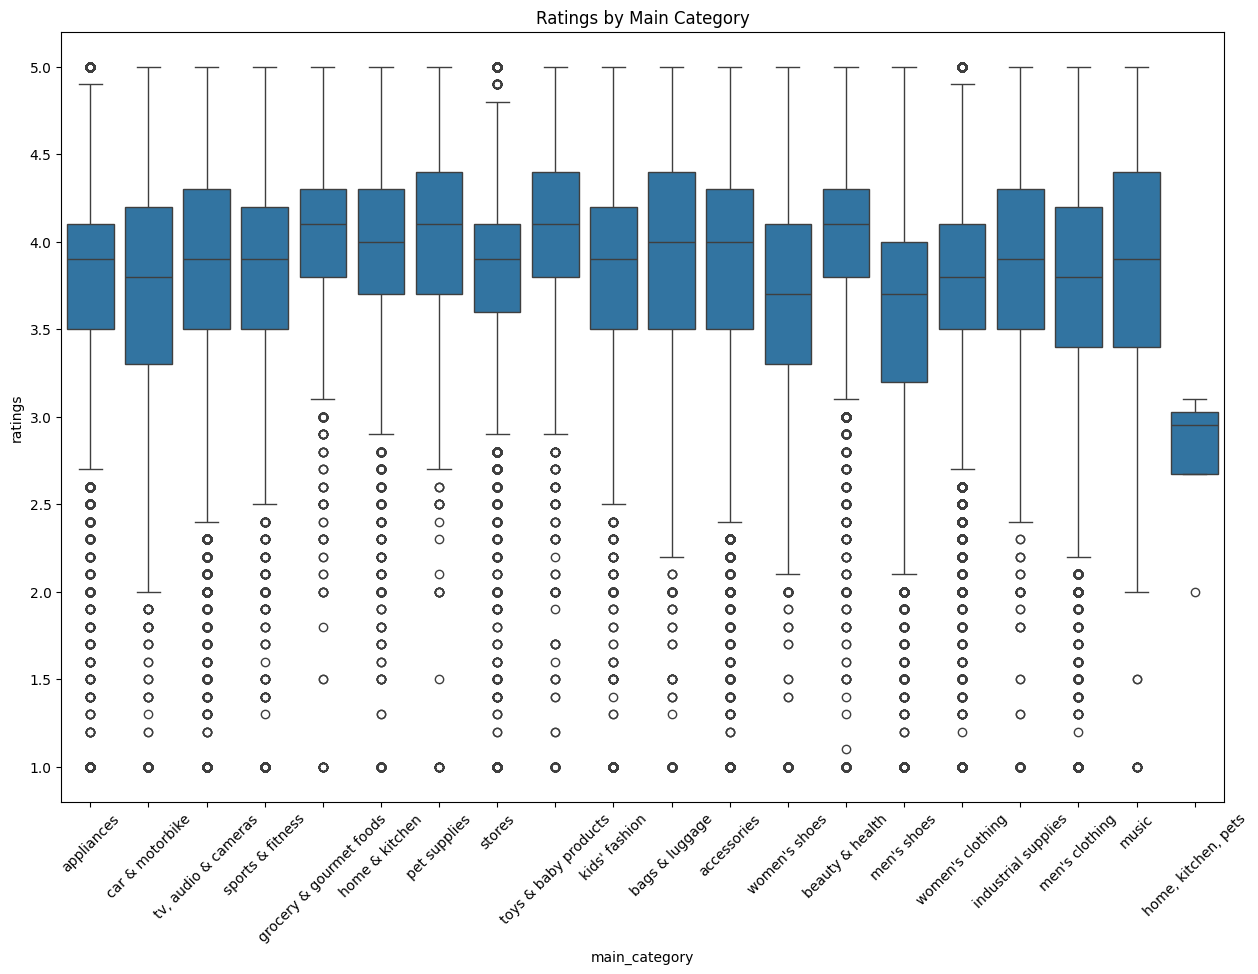

In [29]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x='main_category', y='ratings')
plt.title('Ratings by Main Category')
plt.xticks(rotation=45)
plt.show()

***Observations***
1. **Median Ratings**: Most categories have median ratings between 3.5 and 4.5, indicating generally positive feedback.
2. **Variability**: Some categories show a wider interquartile range, suggesting varied user opinions, while others have a narrower range.
3. **Outliers**: Several categories have outliers, represented by dots outside the main data spread, indicating some significantly different ratings.

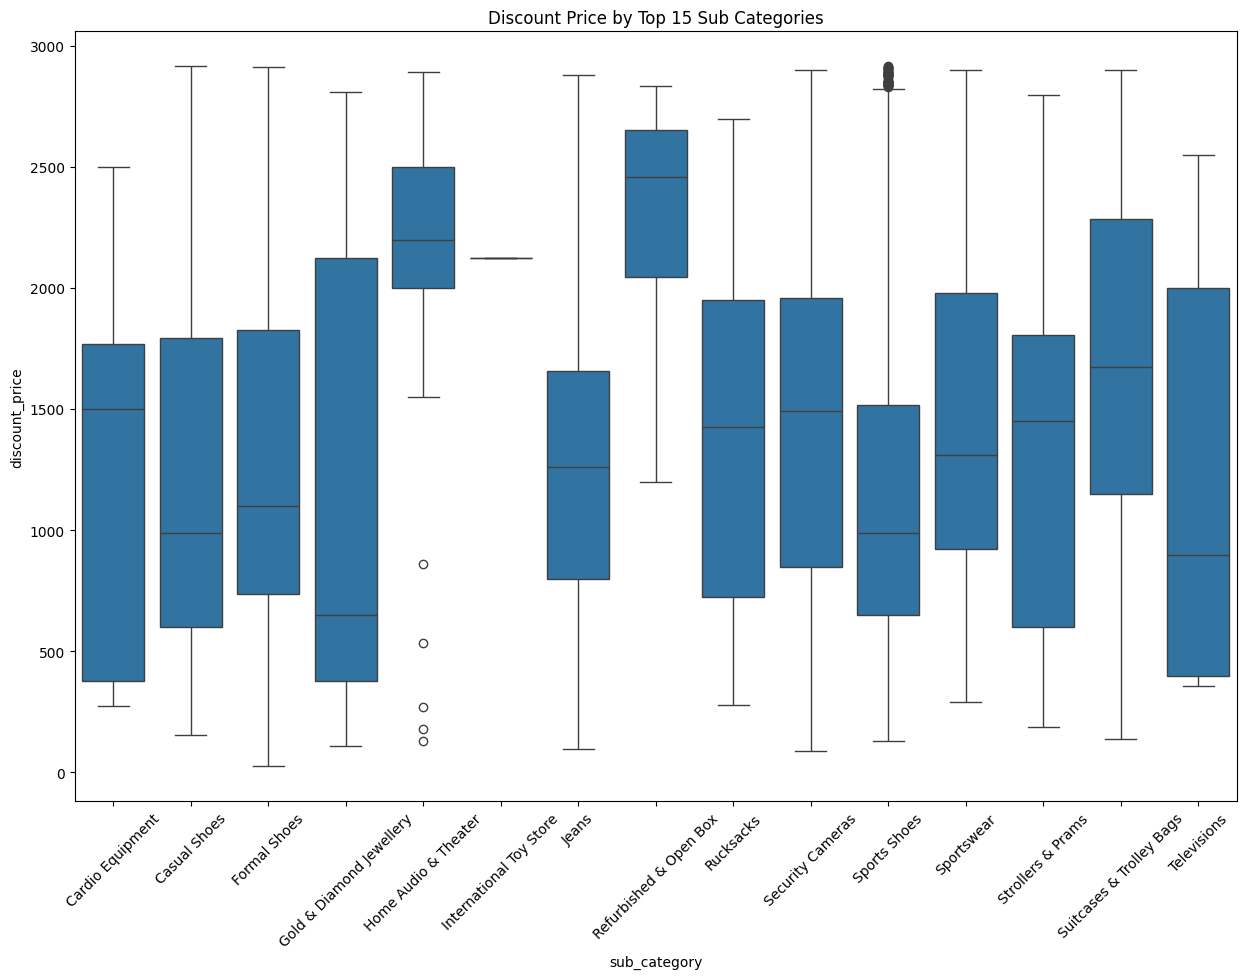

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
top_15_sub_categories = df.groupby('sub_category')['discount_price'].mean().nlargest(15).index
filtered_df = df[df['sub_category'].isin(top_15_sub_categories)]
plt.figure(figsize=(15, 10))
sns.boxplot(data=filtered_df, x='sub_category', y='discount_price')
plt.title('Discount Price by Top 15 Sub Categories')
plt.xticks(rotation=45)
plt.show()


***Observations***
1. **Median Discount Prices**: Each sub-category has a different median discount price, indicating varying pricing strategies or market conditions across sub-categories.
2. **Variation in Discount Prices**: Some sub-categories show a wide interquartile range, suggesting significant variation in discount prices, while others have a narrower range, indicating more consistent pricing.
3. **Outliers**: Several sub-categories have outliers, represented by dots outside the main data spread, indicating some products are priced significantly higher or lower than the majority.

## Bivariate analysis on numerical and numerical features

C:\Users\hp\AppData\Local\Temp\ipykernel_16500\3581177865.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='actual_price', y='discount_price', data=top_5_discounts, palette="YlGnBu")


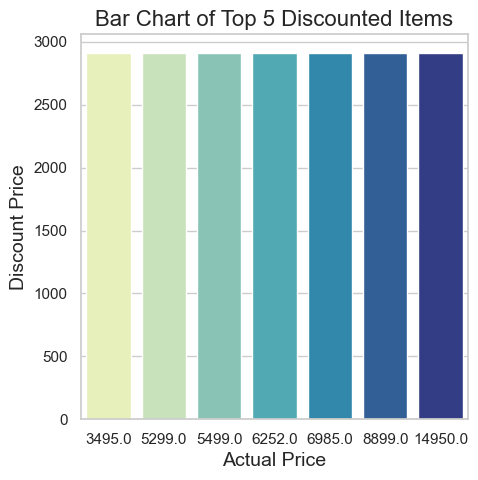

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
top_5_discounts = df.sort_values(by='discount_price', ascending=False).head(10)
plt.figure(figsize=(5,5))
sns.set(style="whitegrid")
sns.barplot(x='actual_price', y='discount_price', data=top_5_discounts, palette="YlGnBu")
plt.title('Bar Chart of Top 5 Discounted Items', fontsize=16)
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Discount Price', fontsize=14)
plt.show()

***Observations***
1. **First Bar** Item priced around 3495 with a discount close to 500 units.
2. **Second Bar** Item priced near 5299 with a discount just above 1000 units.
3. **Third Bar** Item priced at approximately 5499 with a discount slightly less than the second bar’s discount.
4. **Fourth Bar** Item priced around 6252 with a discount nearing the maximum on this chart.
5. **Fifth Bar** Item priced at about 8999 with a maximum range discount close to 3000 units.
6. **Sixth Bar** Item priced at about 14950 with a maximum discout.

As the actual price of the items increases, the discount amount also tends to increase. This suggests that more expensive items are given larger discounts in absolute terms compared to cheaper items.